# 1. Descriptive statistics

- 데이터의 형태, 변수 별 type 및 기술통계량을 뽑는 방법

In [10]:
import pandas as pd
import numpy as np

In [3]:
# column의 이름을 미리 선언
var = ['class','v1','v2','v3','v4','v5','v6','v7','v8']
data = pd.read_csv('data/abalone.csv',header=None,names=var)
data.head(20)

,class,v1,v2,v3,v4,v5,v6,v7,v8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [4]:
# check dimensions of your data.
data.shape

(4177, 9)

In [5]:
# check data type for each variable.
data.dtypes

class     object
v1       float64
v2       float64
v3       float64
v4       float64
v5       float64
v6       float64
v7       float64
v8         int64
dtype: object

### Calculate descriptive statistics.

In [6]:
# 결과물을 잘 보여주기 위한 옵션
pd.set_option('display.width',100)
pd.set_option('precision',2)

description = data.describe()
print(description)


            v1       v2       v3        v4        v5        v6        v7       v8
count  4177.00  4177.00  4177.00  4.18e+03  4.18e+03  4.18e+03  4.18e+03  4177.00
mean      0.52     0.41     0.14  8.29e-01  3.59e-01  1.81e-01  2.39e-01     9.93
std       0.12     0.10     0.04  4.90e-01  2.22e-01  1.10e-01  1.39e-01     3.22
min       0.07     0.06     0.00  2.00e-03  1.00e-03  5.00e-04  1.50e-03     1.00
25%       0.45     0.35     0.12  4.42e-01  1.86e-01  9.35e-02  1.30e-01     8.00
50%       0.55     0.42     0.14  7.99e-01  3.36e-01  1.71e-01  2.34e-01     9.00
75%       0.61     0.48     0.17  1.15e+00  5.02e-01  2.53e-01  3.29e-01    11.00
max       0.81     0.65     1.13  2.83e+00  1.49e+00  7.60e-01  1.00e+00    29.00


## Check class distribution
- 현재 예제 데이터는 **분류(Classification)**하는 문제와 관련이 있다.
- 이러한 경우, 각 클래스 별로 데이터 포인트가 몇 개씩 있는지를 파악하는 것이 중요하다.


In [8]:
class_counts = data.groupby('class').size()
print(type(class_counts))
print(class_counts)

<class 'pandas.core.series.Series'>
class
F    1307
I    1342
M    1528
dtype: int64


## Correlations between variables
- 본 예제에서는 Pearson's correlation coefficient를 계산 (-1이상, 1이하)
- 변수 간의 multicolinearity는 머신러닝 모델의 성능을 저하시키는 주요 요인 중 하나이므로
- 반드시 이를 체크하는 것이 좋다.

In [9]:
correlations = data.corr(method='pearson')
print(correlations)

      v1    v2    v3    v4    v5    v6    v7    v8
v1  1.00  0.99  0.83  0.93  0.90  0.90  0.90  0.56
v2  0.99  1.00  0.83  0.93  0.89  0.90  0.91  0.57
v3  0.83  0.83  1.00  0.82  0.77  0.80  0.82  0.56
v4  0.93  0.93  0.82  1.00  0.97  0.97  0.96  0.54
v5  0.90  0.89  0.77  0.97  1.00  0.93  0.88  0.42
v6  0.90  0.90  0.80  0.97  0.93  1.00  0.91  0.50
v7  0.90  0.91  0.82  0.96  0.88  0.91  1.00  0.63
v8  0.56  0.57  0.56  0.54  0.42  0.50  0.63  1.00


## 2. Visualization
- 각종 시각화 방법을 통해 직관적으로 데이터를 이해

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

## Histogram


array([[<AxesSubplot:title={'center':'v1'}>,
        <AxesSubplot:title={'center':'v2'}>,
        <AxesSubplot:title={'center':'v3'}>],
       [<AxesSubplot:title={'center':'v4'}>,
        <AxesSubplot:title={'center':'v5'}>,
        <AxesSubplot:title={'center':'v6'}>],
       [<AxesSubplot:title={'center':'v7'}>,
        <AxesSubplot:title={'center':'v8'}>, <AxesSubplot:>]],
      dtype=object)

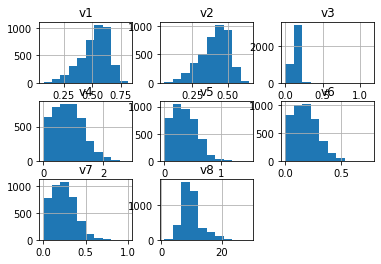

In [12]:
data.hist()

In [13]:
# numpy 자체는 hist라는 메소드가 없음
npdata = np.array(data)
npdata.hist()


AttributeError: 'numpy.ndarray' object has no attribute 'hist'

(array([   7.,   60.,  147.,  304.,  460.,  778., 1051., 1017.,  324.,
          29.]),
 array([0.075, 0.149, 0.22299999999999998, 0.297, 0.371, 0.445,
        0.5189999999999999, 0.593, 0.6669999999999999, 0.7409999999999999,
        0.815], dtype=object),
 <BarContainer object of 10 artists>)

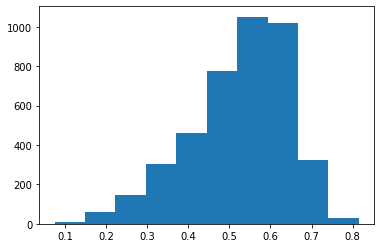

In [14]:
# matplotlib.pyplot에는 hist 메소드가 있다(단일 칼럼에 대해서)
plt.hist(npdata[:,1])

### 다양한 plot

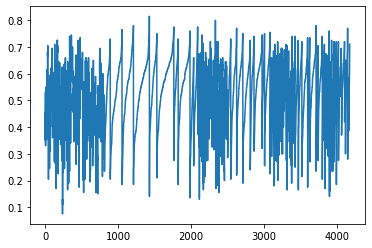

In [15]:
# 단일 column에 대해서
plt.plot(npdata[:,1])

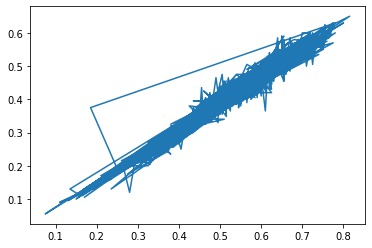

In [17]:
# 각 column을 X,Y 좌표로
plt.plot(npdata[:,1],npdata[:,2])

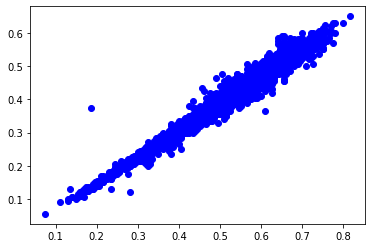

In [18]:
# 각 column을 X,Y 좌표로 및 maker 'o' 추가
plt.plot(npdata[:,1],npdata[:,2],'ob')

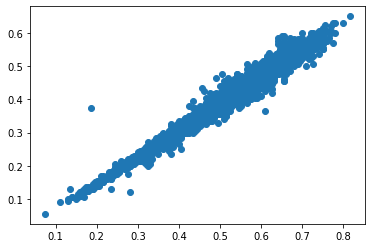

In [20]:
# 각 column을 X,Y 좌표
plt.scatter(npdata[:,1],npdata[:,2])

### Density plots


array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

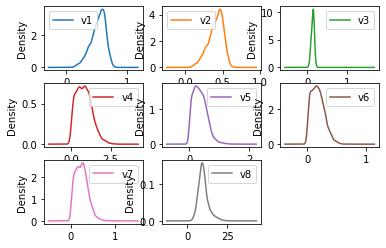

In [22]:
data.plot(kind='density',subplots=True,layout=(3,3),sharex=False)

### Box-plot

v1       AxesSubplot(0.125,0.657941;0.227941x0.222059)
v2    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
v3    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
v4       AxesSubplot(0.125,0.391471;0.227941x0.222059)
v5    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
v6    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
v7          AxesSubplot(0.125,0.125;0.227941x0.222059)
v8       AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

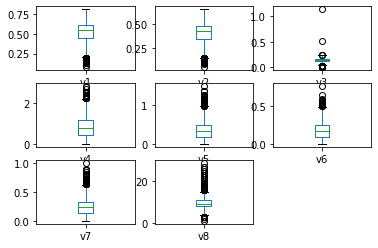

In [23]:
data.plot(kind='box',subplots=True,layout=(3,3),sharex=False,sharey=False)

### Correlation matrix plot


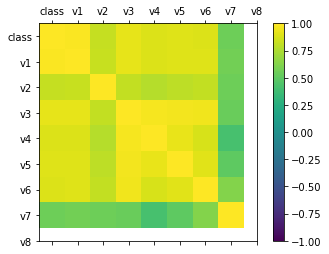

In [25]:
# Calculate Pearson's correlation coefficients(revisited)
correlations = data.corr(method='pearson')

# Plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations,vmin=-1,vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
names = list(data.columns.values) # Data의 변수명을 받아 list로 저장
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()


### Scatter plot matrix


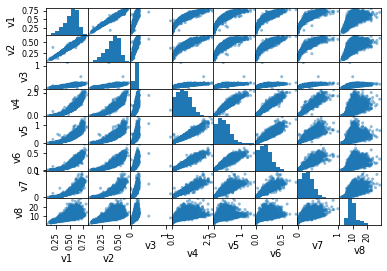

In [26]:
# 변수와 변수와의 관계
# 같은 변수와의 관계면 hist
# 다른 변수와의 관계면 scatter (X,Y)
from pandas.plotting import scatter_matrix
scatter_matrix(data)
plt.show()